In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D ,MaxPool2D , Flatten , Dense , Dropout
from keras.utils import to_categorical
import tensorflow as tf
import keras

In [2]:
mnist = pd.read_csv(r"D:\Scratch Data\MNIST_Train.csv")
mnist = np.array(mnist)

In [3]:
mnist_x = mnist[ : , 1 :]
mnist_y = mnist[:,0]

In [4]:
mnist_x = mnist_x.reshape(-1,28,28,1)   # -1 is take care of default size
mnist_x.shape

(42000, 28, 28, 1)

In [5]:
mnist_x = tf.keras.utils.normalize(mnist_x)
mnist_y = keras.utils.to_categorical(mnist_y)

In [6]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(mnist_x,mnist_y,epochs=2,batch_size=128)

Epoch 1/2
329/329 [==============================] - 24s 72ms/step - loss: 0.2772 - accuracy: 0.9185
Epoch 2/2
329/329 [==============================] - 24s 73ms/step - loss: 0.1667 - accuracy: 0.9493


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

In [11]:
pred= model.predict_classes(mnist_x)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [12]:
pred

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [13]:
mnist = pd.read_csv(r"D:\Scratch Data\MNIST_Train.csv")
mnist_y = mnist.iloc[:,0]

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
tab1 = confusion_matrix(pred,mnist_y)

In [16]:
tab1

array([[4068,    0,    5,    3,    2,    6,   10,    1,    8,   19],
       [   0, 4602,    7,    8,   11,    0,    5,    8,   25,   10],
       [   6,   25, 4060,   29,    4,    0,    3,   26,    9,    1],
       [   1,   12,   28, 4171,    0,   31,    1,    7,   28,   26],
       [   2,    9,    5,    0, 3918,    1,    6,    5,   10,   21],
       [   7,    0,    0,   44,    1, 3707,   22,    1,   26,   13],
       [  16,    3,    1,    2,   10,   21, 4076,    1,   13,    1],
       [   0,    8,   41,   28,    9,    2,    0, 4294,   10,   55],
       [  29,   23,   28,   44,    9,   20,   14,    7, 3903,   21],
       [   3,    2,    2,   22,  108,    7,    0,   51,   31, 4021]],
      dtype=int64)

In [17]:
Accuracy = tab1.diagonal().sum() / tab1.sum()*100
Accuracy

97.19047619047619

In [ ]:
### CNN on the external data

In [7]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [8]:
#pip install opencv-python

In [13]:
path1 = r"E:\Photos\Transport1"
transport = ['0air','1train','2ship','3bus','4car','5bike','6auto','7truck','8camel','9horse','10elephant']
## Created the name path and then the subfolders 

In [14]:
transport

['0air',
 '1train',
 '2ship',
 '3bus',
 '4car',
 '5bike',
 '6auto',
 '7truck',
 '8camel',
 '9horse',
 '10elephant']

In [15]:
for i in transport:
    folders = os.path.join(path1,i)
    print(folders)
    ## This is not part of main code its just for better understanding

E:\Photos\Transport1\0air
E:\Photos\Transport1\1train
E:\Photos\Transport1\2ship
E:\Photos\Transport1\3bus
E:\Photos\Transport1\4car
E:\Photos\Transport1\5bike
E:\Photos\Transport1\6auto
E:\Photos\Transport1\7truck
E:\Photos\Transport1\8camel
E:\Photos\Transport1\9horse
E:\Photos\Transport1\10elephant


In [16]:
for i in transport:
    folders = os.path.join(path1,i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders , image)
        print(image_path)
        
 ##This is not part of main code its just for better understanding

E:\Photos\Transport1\0air\0air.jpg
E:\Photos\Transport1\0air\1air.jfif
E:\Photos\Transport1\0air\2air.jpg
E:\Photos\Transport1\0air\3air.jfif
E:\Photos\Transport1\0air\4air.jfif
E:\Photos\Transport1\1train\0train.jfif
E:\Photos\Transport1\1train\1train.jpg
E:\Photos\Transport1\1train\2train.jfif
E:\Photos\Transport1\1train\3train.jpg
E:\Photos\Transport1\1train\4train.jfif
E:\Photos\Transport1\2ship\0ship.jpg
E:\Photos\Transport1\2ship\1ship.jfif
E:\Photos\Transport1\2ship\2ship.jfif
E:\Photos\Transport1\2ship\3ship.jfif
E:\Photos\Transport1\2ship\4ship.jfif
E:\Photos\Transport1\3bus\0bus.jfif
E:\Photos\Transport1\3bus\1bus.jfif
E:\Photos\Transport1\3bus\2bus.jfif
E:\Photos\Transport1\3bus\3bus.jfif
E:\Photos\Transport1\3bus\4bus.jfif
E:\Photos\Transport1\4car\0car.JPG
E:\Photos\Transport1\4car\1car.JPG
E:\Photos\Transport1\4car\2car.jpg
E:\Photos\Transport1\4car\3car.JPG
E:\Photos\Transport1\4car\4car.JPG
E:\Photos\Transport1\4car\5car.JPG
E:\Photos\Transport1\5bike\0bike.JPG
E:\Photo

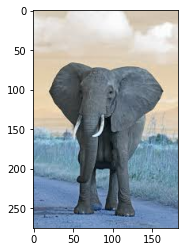

In [17]:
for i in transport:
    folders = os.path.join(path1,i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders , image)
        image_array  = cv2.imread(image_path)   ## Using the cv2 i m reading the image and storing in variable image_array
        plt.imshow(image_array)
        break
        
 ##This is not part of main code its just for better understanding    

In [19]:
image_size = 200

path1 = r"E:\Photos\Transport1"
transport = ['0air','1train','2ship','3bus','4car','5bike','6auto','7truck','8camel','9horse','10elephant']

input_image = []
for i in transport:
    folders = os.path.join(path1,i)
    label = transport.index(i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders , image)
        image_array = cv2.imread(image_path)
        image_array  = cv2.resize(image_array,(image_size,image_size))  
        input_image.append([image_array,label])


In [20]:
np.random.shuffle(input_image)

In [21]:
X=[]
Y=[]
for X_values , labels in input_image:
    X.append(X_values)
    Y.append(labels)

In [22]:
X = np.array(X)
Y=np.array(Y)

In [23]:
X.shape
# 10 = total image
#200 = size
#3=depth

(59, 200, 200, 3)

In [24]:
X = X/255           # 255 pixel size

In [25]:
model = Sequential()
model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu' , )) 
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu' , input_shape = X.shape[1:]))
model.add(Dropout(0.4))
model.add(Dense(11, activation='softmax'))

model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
## Arguments:
#  Optimizer :- The optimizer used to reduce the cost calculated by cross-entropy
#  Loss :- The loss function used to calculate the error 
#  Metrics :- The metrices used to represent the efficiency of the model
#  Activation :- the activation function in each code
#  Pool_size :- The shape of the pooling window

In [27]:
model.fit(X,Y,epochs=10)

Epoch 1/10
2/2 [==============================] - 1s 565ms/step - loss: 4.1241 - accuracy: 0.1017
Epoch 2/10
2/2 [==============================] - 1s 555ms/step - loss: 3.3474 - accuracy: 0.1186
Epoch 3/10
2/2 [==============================] - 1s 653ms/step - loss: 2.3615 - accuracy: 0.1356
Epoch 4/10
2/2 [==============================] - 2s 765ms/step - loss: 2.1037 - accuracy: 0.4068
Epoch 5/10
2/2 [==============================] - 1s 729ms/step - loss: 1.8689 - accuracy: 0.3729
Epoch 6/10
2/2 [==============================] - 1s 561ms/step - loss: 1.4318 - accuracy: 0.5932
Epoch 7/10
2/2 [==============================] - 1s 644ms/step - loss: 1.1947 - accuracy: 0.6780
Epoch 8/10
2/2 [==============================] - 1s 470ms/step - loss: 0.9395 - accuracy: 0.7288
Epoch 9/10
2/2 [==============================] - 1s 482ms/step - loss: 0.7549 - accuracy: 0.8136
Epoch 10/10
2/2 [==============================] - 1s 470ms/step - loss: 0.6104 - accuracy: 0.8475


In [61]:
pred= model.predict_classes(X)

In [62]:
tab1 = confusion_matrix(pred,Y)
tab1

array([[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6]], dtype=int64)

In [63]:
Accuracy = tab1.diagonal().sum() / tab1.sum()*100
Accuracy

100.0